In [1]:
import os
import sys
from collections import defaultdict, Counter
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from pymutspec.draw import plot_mutspec12

In [2]:
spectra = pd.read_csv("./2_Raw/Interim/ActinopterygiiPolymorphisms.MutSpecData.csv")
spectra = spectra[
    # (spectra["Gene"] == "CytB") & 
    (spectra["Species"].str.startswith("Engraulis"))]

In [3]:
spectra

,Species,Gene,NumOfFourFoldMut,NumberOfSeq,Class,T.heavy,A.heavy,C.heavy,G.heavy,FrA.heavy,...,T_A.SubstRate.heavy,T_C.SubstRate.heavy,G_T.SubstRate.heavy,G_C.SubstRate.heavy,G_A.SubstRate.heavy,C_G.SubstRate.heavy,C_T.SubstRate.heavy,C_A.SubstRate.heavy,temperature,matur_tm
404,Engraulis_encrasicolus,CytB,46,14,Actinopterygii,1014,821,324,650,0.292275,...,0.001972,0.013807,0.0,0.003077,0.009231,0.006173,0.040123,0.0,14.15,1.0


In [4]:
Counter("TTTGGATCCCTTTTAGGACTATGCTTGGCCACACAAATCCTTACAGGACTTTTCCTAGCCATACACTACACCTCAGACATCGCTACCGCTTTCTCGTCAGTGGCCCACATTTGTCGAGACGTAAATTACGGGTGACTTATCCGAAATATGCATGCAAACGGAGCCTCATTCTTTTTCATCTGCATTTATGCACACATTGCTCGGGGACTGTACTACGGTTCTTATCTTTACATAGAAACTTGAAACATCGGAGTAGTACTACTTCTTTTAGTTATGATGACTGCCTTCGTTGGGTACGTACTACCCTGAGGACAAATGTCCTTCTGAGGGGCAACTGTCATTACTAACCTTATGTCTGCAGTTCCTTACGTGGGCACTGAATTAGTCCAATGAATTTGAGGAGGCTTTTCGGTCGACAACGCGACTCTTACTCGGTTCTTCGCCTTCCACTTCTTGTTCCCCTTCGTCATTGCGGGTGTTACTATCCTTCACCTTTTATTTTTACACGAAACAGGGTCTAACAACCCAGCGGGGCTCAATTCTGACGCCGATAAAATCGCATTCCACCCATACTTCTCTTATAAAGATCTCTTAGGGTTCGCAGTAATGCTGCTGGCACTAACCTCACTGGCATTATTTTCCCCTAACTTATTAGGAGACCCTGATAATTTTACCCCAGCTAATCCCCTTGTCACCCCACCTCATATTAAGCCTGAGTGATACTTCCTCTTTGCTTACGCTATTCTCCGGTCTATCCCGAACAAACTAGGTGGAGTACTTGCCCTCCTATTTTCTATTCTAGTTCTTATGGTCGTACCCATCTTGCACACCTCTAAACAACGAGGAATTACTTTCCGACCCATTACGCAGTTCCTATTCTGAACCCTTGTTGCCGACGTCATCATTCTTACATGAATCGGAGGTATGCCAGTCGAACACCCATTCATTATTATTGGTCAAGTAGCATCGCTACTCTACTTCTCTATTTTCCTTGTACTAGCTCCGGTGGCAGGATGACTAGAGAACAAAGCCCTAAACTGAAACT")

Counter({'T': 331, 'G': 184, 'A': 247, 'C': 283})

In [5]:
spectra.columns

Index(['Species', 'Gene', 'NumOfFourFoldMut', 'NumberOfSeq', 'Class',
       'T.heavy', 'A.heavy', 'C.heavy', 'G.heavy', 'FrA.heavy', 'FrT.heavy',
       'FrG.heavy', 'FrC.heavy', 'A_G.heavy', 'A_T.heavy', 'A_C.heavy',
       'T_G.heavy', 'T_A.heavy', 'T_C.heavy', 'G_T.heavy', 'G_C.heavy',
       'G_A.heavy', 'C_G.heavy', 'C_T.heavy', 'C_A.heavy',
       'A_G.SubstRate.heavy', 'A_T.SubstRate.heavy', 'A_C.SubstRate.heavy',
       'T_G.SubstRate.heavy', 'T_A.SubstRate.heavy', 'T_C.SubstRate.heavy',
       'G_T.SubstRate.heavy', 'G_C.SubstRate.heavy', 'G_A.SubstRate.heavy',
       'C_G.SubstRate.heavy', 'C_T.SubstRate.heavy', 'C_A.SubstRate.heavy',
       'temperature', 'matur_tm'],
      dtype='object')

In [6]:
columns_rate = ['A_G.SubstRate.heavy', 'A_T.SubstRate.heavy', 'A_C.SubstRate.heavy',
       'T_G.SubstRate.heavy', 'T_A.SubstRate.heavy', 'T_C.SubstRate.heavy',
       'G_T.SubstRate.heavy', 'G_C.SubstRate.heavy', 'G_A.SubstRate.heavy',
       'C_G.SubstRate.heavy', 'C_T.SubstRate.heavy', 'C_A.SubstRate.heavy',]

In [7]:
ms_some_anch = spectra[columns_rate].rename(columns=lambda x: x[:3].replace("_", ">")).T
ms_some_anch.index.name = "Mut"
ms_some_anch.columns = ["MutSpec"]
ms_some_anch = ms_some_anch.reset_index()

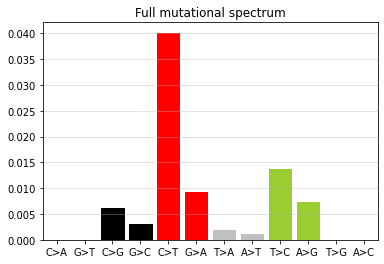

<AxesSubplot:title={'center':'Full mutational spectrum'}>

In [8]:
plot_mutspec12(ms_some_anch)

In [11]:
ms_some_anch["MutSpec"] = ms_some_anch["MutSpec"] / ms_some_anch["MutSpec"].sum()
ms_some_anch["Who"] = "Engraulis_encrasicolus\n(old spectra)"

sbs12_ordered = ["C>A", "G>T", "C>G", "G>C", "C>T", "G>A", "T>A", "A>T", "T>C", "A>G", "T>G", "A>C"]

## ms12syn

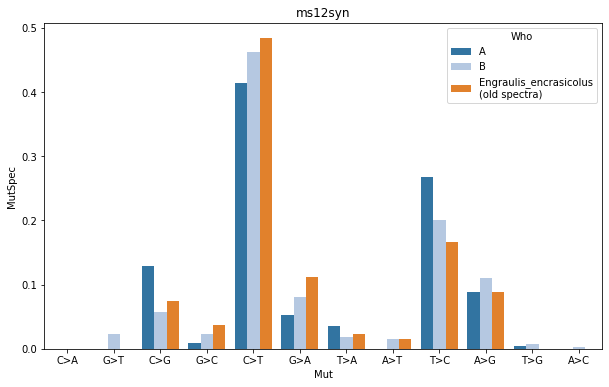

In [30]:
ms12a = pd.read_csv("./3_Derived/mutspec12/cladeA_ms12syn_iqtree.tsv", sep="\t")
ms12b = pd.read_csv("./3_Derived/mutspec12/cladeB_ms12syn_iqtree.tsv", sep="\t")

ms12a["Who"] = "A"
ms12b["Who"] = "B"

plt.figure(figsize=(10, 6))
plt.title("ms12syn")
sns.barplot(data=pd.concat([ms12a,ms12b, ms_some_anch]), x="Mut", y="MutSpec", hue="Who", order=sbs12_ordered, palette="tab20")
plt.show()

In [31]:
ms12a.sort_values("Mut")

,Mut,ObsNum,ExpNum,MutSpec,Who
10,A>C,0.000000,56.444381,0.000000,A
7,A>G,26.836862,103.737991,0.089019,A
8,A>T,0.000000,56.444381,0.000000,A
11,C>A,0.000000,21.385701,0.000000,A
6,C>G,7.983803,21.385701,0.128462,A
5,C>T,44.332619,36.891280,0.413510,A
4,G>A,20.014386,132.509290,0.051974,A
3,G>C,0.993946,40.935287,0.008355,A
9,G>T,0.000000,40.935287,0.000000,A
2,T>A,6.974850,66.705291,0.035980,A


In [29]:
ms12a2.sort_values("Mut")

,Mut,ObsNum,ExpNum,MutSpec,Who
10,A>C,0.994229,58.733574,0.002582,A
9,A>G,77.672470,109.668599,0.108017,A
8,A>T,6.970555,58.733574,0.018100,A
11,C>A,0.000000,23.613922,0.000000,A
7,C>G,9.951780,23.613922,0.064275,A
6,C>T,117.367096,40.311262,0.444045,A
5,G>A,68.683522,126.899840,0.082546,A
4,G>C,3.983781,40.078840,0.015160,A
3,G>T,6.970912,40.078840,0.026527,A
2,T>A,8.943068,63.337180,0.021535,A


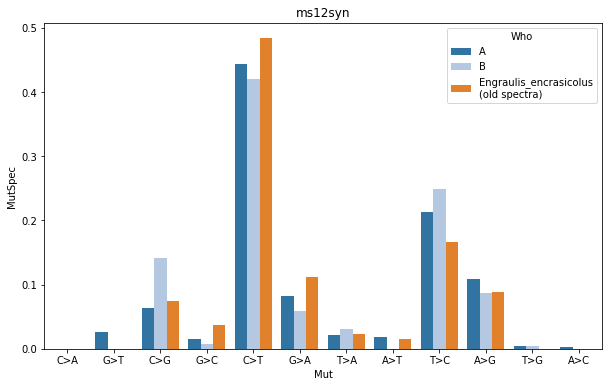

In [25]:
ms12a2 = pd.read_csv("./3_Derived/mutspec12/cladeA_ms12syn_iqtree2.tsv", sep="\t")
ms12b2 = pd.read_csv("./3_Derived/mutspec12/cladeB_ms12syn_iqtree2.tsv", sep="\t")

ms12a2["Who"] = "A"
ms12b2["Who"] = "B"

plt.figure(figsize=(10, 6))
plt.title("ms12syn")
sns.barplot(data=pd.concat([ms12a2,ms12b2, ms_some_anch]), x="Mut", y="MutSpec", hue="Who", order=sbs12_ordered, palette="tab20")
plt.show()

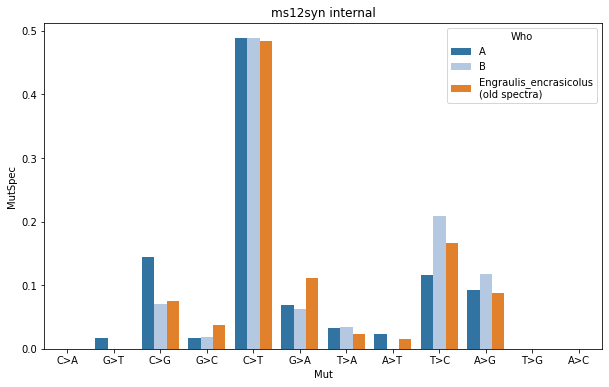

In [15]:
ms12a = pd.read_csv("./3_Derived/mutspec12/cladeA_ms12syn_internal_iqtree.tsv", sep="\t")
ms12b = pd.read_csv("./3_Derived/mutspec12/cladeB_ms12syn_internal_iqtree.tsv", sep="\t")

ms12a["Who"] = "A"
ms12b["Who"] = "B"

plt.figure(figsize=(10, 6))
plt.title("ms12syn internal")
sns.barplot(data=pd.concat([ms12a,ms12b, ms_some_anch]), x="Mut", y="MutSpec", hue="Who", order=sbs12_ordered, palette="tab20")
plt.show()

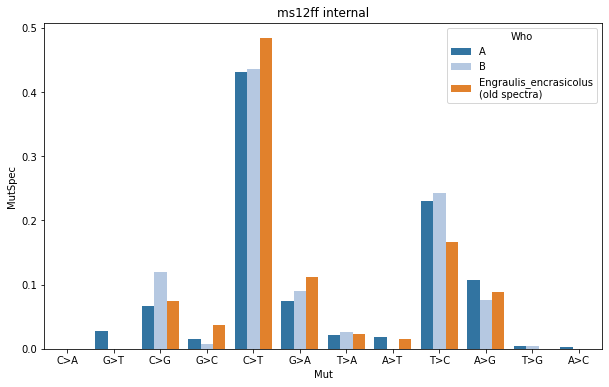

In [19]:
ms12a = pd.read_csv("./3_Derived/mutspec12/cladeA_ms12ff_iqtree.tsv", sep="\t")
ms12b = pd.read_csv("./3_Derived/mutspec12/cladeB_ms12ff_iqtree.tsv", sep="\t")

ms12a["Who"] = "A"
ms12b["Who"] = "B"

plt.figure(figsize=(10, 6))
plt.title("ms12ff internal")
sns.barplot(data=pd.concat([ms12a,ms12b, ms_some_anch]), x="Mut", y="MutSpec", hue="Who", order=sbs12_ordered, palette="tab20")
plt.show()

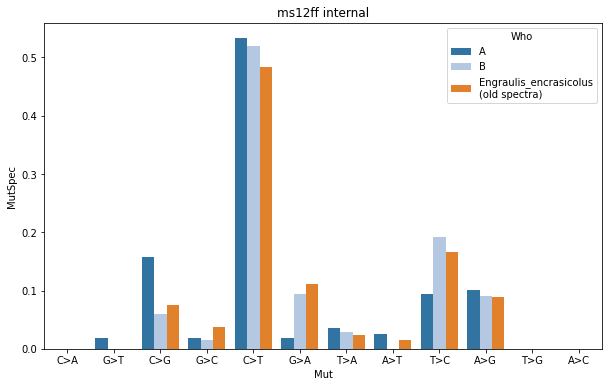

In [20]:
ms12a = pd.read_csv("./3_Derived/mutspec12/cladeA_ms12ff_internal_iqtree.tsv", sep="\t")
ms12b = pd.read_csv("./3_Derived/mutspec12/cladeB_ms12ff_internal_iqtree.tsv", sep="\t")

ms12a["Who"] = "A"
ms12b["Who"] = "B"

plt.figure(figsize=(10, 6))
plt.title("ms12ff internal")
sns.barplot(data=pd.concat([ms12a,ms12b, ms_some_anch]), x="Mut", y="MutSpec", hue="Who", order=sbs12_ordered, palette="tab20")
plt.show()